In [1]:
import numpy as np
import pandas as pd

In [2]:
df_train = pd.read_csv('Train_Dataset.csv')
df_test= pd.read_csv('Test_Dataset.csv')

In [3]:
def drop_columns(df,columns):
    df.drop(columns,axis=1,inplace=True,errors='ignore')

In [4]:
def drop_duplicates(df):
    df_train.drop_duplicates(inplace=True)

In [5]:
df_baseline_train = df_train.copy()
df_baseline_test = df_test.copy()

In [6]:
# df_train.head()

In [7]:
# df_test.head()

In [8]:
drop_features =['customer_id','Unnamed: 19','Unnamed: 20']
drop_columns(df_train,drop_features)
drop_columns(df_test,drop_features)

In [9]:
# df_train.head()

In [10]:
# df_test.head()

In [11]:
df_train.duplicated().sum()

4

In [12]:
df_test.duplicated().sum()

0

In [13]:
drop_duplicates(df_train)
df_train.duplicated().sum()

0

In [14]:
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     5
dtype: int64

In [15]:
df_test.isnull().sum()

account_length            0
location_code             2
intertiol_plan            4
voice_mail_plan           4
number_vm_messages        1
total_day_min             3
total_day_calls           3
total_day_charge          4
total_eve_min             2
total_eve_calls           0
total_eve_charge          9
total_night_minutes       3
total_night_calls         2
total_night_charge        2
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         0
customer_service_calls    1
dtype: int64

In [16]:
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
# msno.bar(df_train)

In [18]:
# msno.matrix(df_train.sort_values(by='Churn'))

In [19]:
df_train.dropna(inplace=True,subset=['Churn'])
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        3
total_day_min             1
total_day_calls           3
total_day_charge          5
total_eve_min             3
total_eve_calls           4
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        2
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [20]:
def mark_minus_invalids_as_nan(df,columns):
    for col in columns:
        # df[df[col]<0][col]=np.nan
        df.loc[df[col]<0,col]=np.nan

In [21]:
def find_minus(df,columns):
    for col in columns:
        print(col," = ",df[df[col]<0].shape[0])

In [22]:
categorical = ['intertiol_plan', 'voice_mail_plan', 'Churn', 'location_code']
numerical =['account_length',
           'number_vm_messages',
           'total_day_min',
           'total_day_calls',
           'total_day_charge',
           'total_eve_min',
           'total_eve_calls',
           'total_eve_charge',
           'total_night_minutes',
           'total_night_calls',
           'total_night_charge',
           'total_intl_minutes',
           'total_intl_calls',
           'total_intl_charge',
           'customer_service_calls']

In [23]:
find_minus(df_train,columns=numerical)

account_length  =  0
number_vm_messages  =  1
total_day_min  =  4
total_day_calls  =  1
total_day_charge  =  2
total_eve_min  =  1
total_eve_calls  =  2
total_eve_charge  =  0
total_night_minutes  =  0
total_night_calls  =  0
total_night_charge  =  0
total_intl_minutes  =  3
total_intl_calls  =  0
total_intl_charge  =  0
customer_service_calls  =  0


In [24]:
mark_minus_invalids_as_nan(df_train,numerical)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             5
total_day_calls           4
total_day_charge          7
total_eve_min             4
total_eve_calls           6
total_eve_charge          8
total_night_minutes       2
total_night_calls         5
total_night_charge        5
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

In [25]:
def get_quantile_bounds(df,features):
    bounds = {f:[0,0] for f in features}
    for f in features:
        q1= df[f].quantile(q=0.25)
        q3= df[f].quantile(q=0.75)
        IQR = q3 -q1
        lower_bound = q1-(1.5*IQR)
        upper_bound = q3+(1.5*IQR)
        bounds[f][0] = lower_bound
        bounds[f][1] = upper_bound
    return bounds

In [26]:
def check_outliers_by_visualisation(df,features):
    x=len(features)
    fig, axs = plt.subplots(x, 2, figsize=(10, 4*x))
    for i,f in enumerate(features):
        # print(i,f)
        sns.distplot(df[f],rug=True,ax=axs[i][0])
        sns.boxplot(x =f, data = df,ax=axs[i][1])
    plt.show()

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

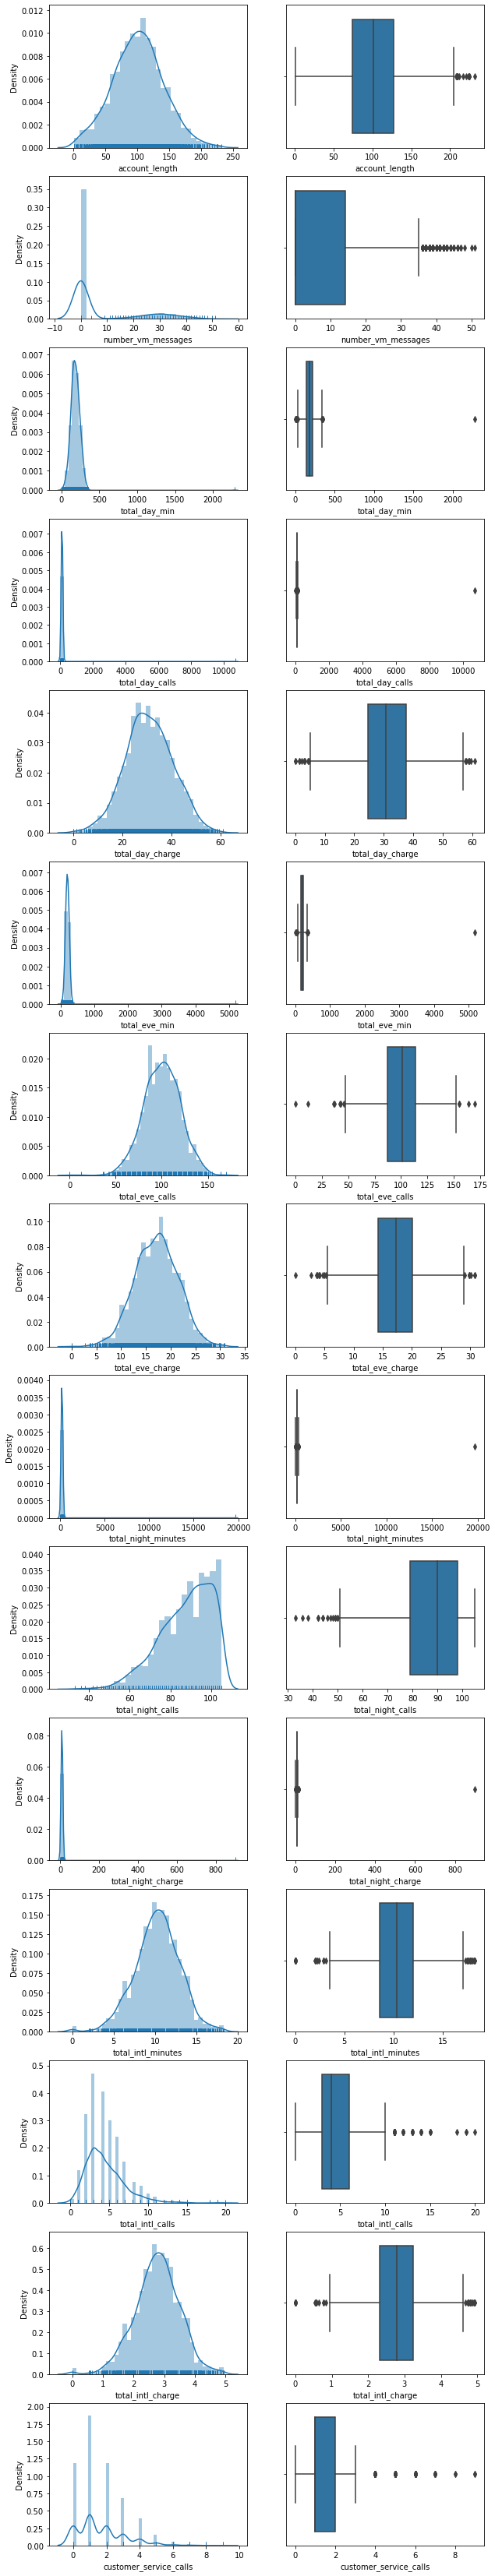

In [27]:
check_outliers_by_visualisation(df_train,numerical)


In [28]:
def set_nan(df,bounds):
    data = df.copy()
    for key in bounds.keys():
        # print("values",bounds[key])
        data.loc[data[key] < bounds[key][0] , key] = np.nan
        data.loc[data[key] > bounds[key][1] , key] = np.nan
    return data

In [29]:
b = get_quantile_bounds(df_train,numerical)
b

{'account_length': [-5.5, 206.5],
 'number_vm_messages': [-21.375, 35.625],
 'total_day_min': [28.99999999999997, 336.20000000000005],
 'total_day_calls': [45.0, 157.0],
 'total_day_charge': [4.864999999999995, 57.22500000000001],
 'total_eve_min': [60.737499999999926, 341.8375000000001],
 'total_eve_calls': [46.5, 154.5],
 'total_eve_charge': [5.3149999999999995, 28.955],
 'total_night_minutes': [65.85000000000005, 336.44999999999993],
 'total_night_calls': [50.5, 126.5],
 'total_night_charge': [2.955000000000001, 15.155],
 'total_intl_minutes': [3.499999999999999, 17.1],
 'total_intl_calls': [-1.5, 10.5],
 'total_intl_charge': [0.9399999999999993, 4.620000000000001],
 'customer_service_calls': [-0.5, 3.5]}

In [30]:
bounds = {'account_length': [-5.5, 206.5],
 'number_vm_messages': [-21.375, 35.625],
 'total_day_min': [28.99999999999997, 336.20000000000005],
 'total_day_calls': [45.0, 157.0],
 'total_day_charge': [4.864999999999995, 57.22500000000001],
 'total_eve_min': [60.737499999999926, 341.8375000000001],
 'total_eve_calls': [46.5, 154.5],
 'total_eve_charge': [5.3149999999999995, 28.955],
 'total_night_minutes': [65.85000000000005, 336.44999999999993],
 'total_night_calls': [50.5, 126.5],
 'total_night_charge': [2.955000000000001, 15.155],
 'total_intl_minutes': [3.499999999999999, 17.1],
 'total_intl_calls': [-1.5, 10.5],
 'total_intl_charge': [0.9399999999999993, 4.620000000000001],
 'customer_service_calls': [-0.5, 3.5]}

In [31]:
b2= {i:[0,800] for i in numerical}
b2

{'account_length': [0, 800],
 'number_vm_messages': [0, 800],
 'total_day_min': [0, 800],
 'total_day_calls': [0, 800],
 'total_day_charge': [0, 800],
 'total_eve_min': [0, 800],
 'total_eve_calls': [0, 800],
 'total_eve_charge': [0, 800],
 'total_night_minutes': [0, 800],
 'total_night_calls': [0, 800],
 'total_night_charge': [0, 800],
 'total_intl_minutes': [0, 800],
 'total_intl_calls': [0, 800],
 'total_intl_charge': [0, 800],
 'customer_service_calls': [0, 800]}

In [32]:
df_train = set_nan(df_train,b2)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             6
total_day_calls           5
total_day_charge          7
total_eve_min             5
total_eve_calls           6
total_eve_charge          8
total_night_minutes       3
total_night_calls         5
total_night_charge        6
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\lib\site-packages\seaborn\distributions.py:2103: FutureWarning: The `axis` variable is no l

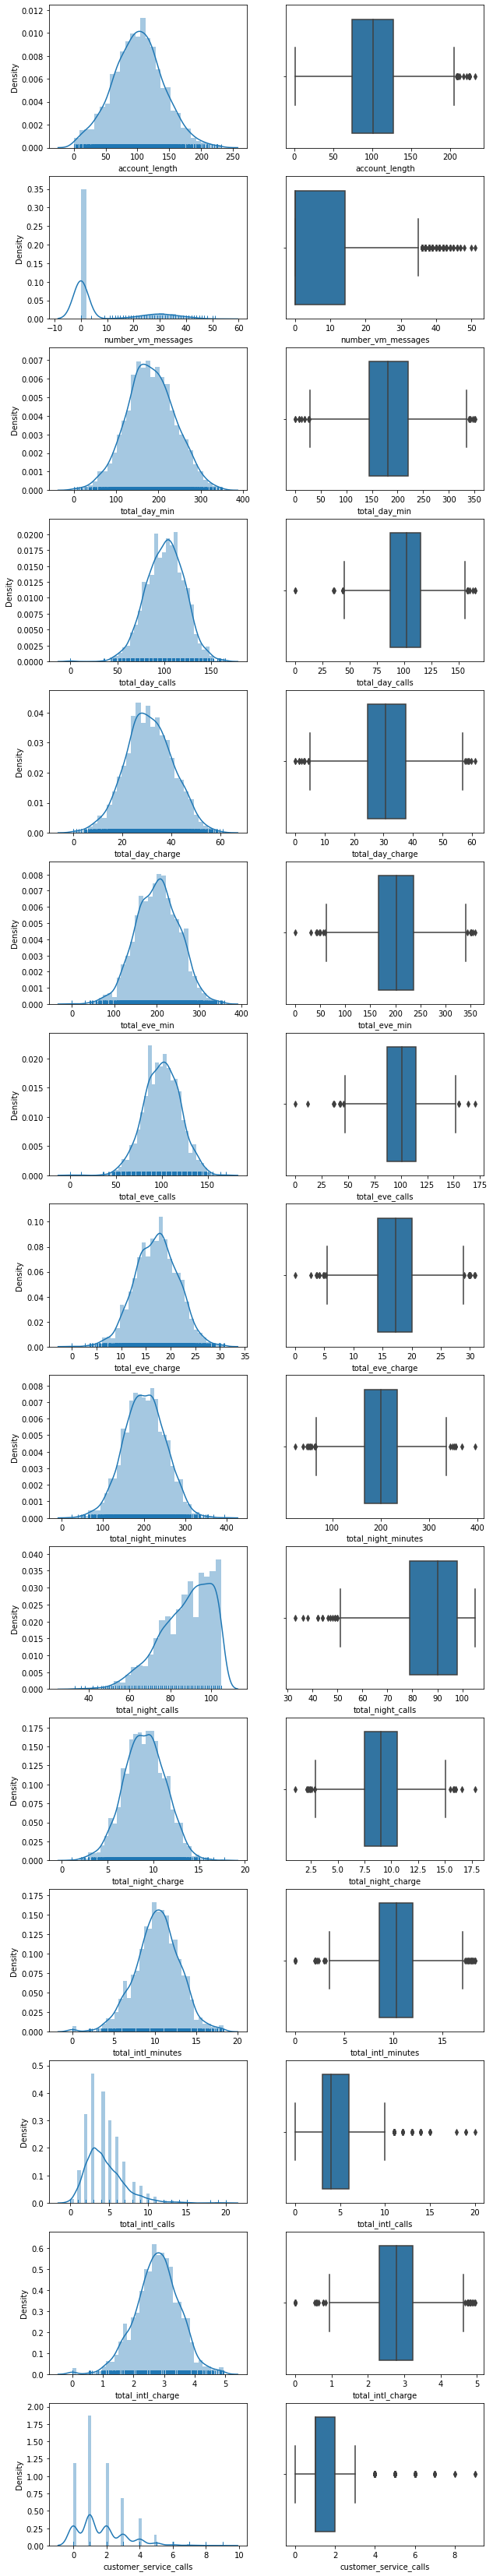

In [33]:
check_outliers_by_visualisation(df_train,numerical)

In [34]:
qb = get_quantile_bounds(df_train,numerical)
qb

{'account_length': [-5.5, 206.5],
 'number_vm_messages': [-21.375, 35.625],
 'total_day_min': [28.99999999999997, 336.20000000000005],
 'total_day_calls': [45.0, 157.0],
 'total_day_charge': [4.864999999999995, 57.22500000000001],
 'total_eve_min': [60.64999999999998, 341.85],
 'total_eve_calls': [46.5, 154.5],
 'total_eve_charge': [5.3149999999999995, 28.955],
 'total_night_minutes': [65.90000000000002, 336.3],
 'total_night_calls': [50.5, 126.5],
 'total_night_charge': [2.955000000000001, 15.155],
 'total_intl_minutes': [3.499999999999999, 17.1],
 'total_intl_calls': [-1.5, 10.5],
 'total_intl_charge': [0.9399999999999993, 4.620000000000001],
 'customer_service_calls': [-0.5, 3.5]}

In [35]:
qb4={'account_length': [0, 206.5],
 'number_vm_messages': [-21.375, 35.625],
 'total_day_min': [28.99999999999997, 336.20000000000005],
 'total_day_calls': [45.0, 157.0],
 'total_day_charge': [4.864999999999995, 57.22500000000001],
 'total_eve_min': [60.64999999999998, 341.85],
 'total_eve_calls': [46.5, 154.5],
 'total_eve_charge': [5.3149999999999995, 28.955],
 'total_night_minutes': [65.90000000000002, 336.3],
 'total_night_calls': [50.5, 126.5],
 'total_night_charge': [2.955000000000001, 15.155],
 'total_intl_minutes': [3.499999999999999, 17.1],
 'total_intl_calls': [-1.5, 10.5],
 'total_intl_charge': [0.9399999999999993, 4.620000000000001],
 'customer_service_calls': [-0.5, 3.5]}

In [36]:
qb4

{'account_length': [0, 206.5],
 'number_vm_messages': [-21.375, 35.625],
 'total_day_min': [28.99999999999997, 336.20000000000005],
 'total_day_calls': [45.0, 157.0],
 'total_day_charge': [4.864999999999995, 57.22500000000001],
 'total_eve_min': [60.64999999999998, 341.85],
 'total_eve_calls': [46.5, 154.5],
 'total_eve_charge': [5.3149999999999995, 28.955],
 'total_night_minutes': [65.90000000000002, 336.3],
 'total_night_calls': [50.5, 126.5],
 'total_night_charge': [2.955000000000001, 15.155],
 'total_intl_minutes': [3.499999999999999, 17.1],
 'total_intl_calls': [-1.5, 10.5],
 'total_intl_charge': [0.9399999999999993, 4.620000000000001],
 'customer_service_calls': [-0.5, 3.5]}

In [37]:
# df_train = set_nan(df_train,qb)
df_train.isnull().sum()

account_length            2
location_code             0
intertiol_plan            3
voice_mail_plan           6
number_vm_messages        4
total_day_min             6
total_day_calls           5
total_day_charge          7
total_eve_min             5
total_eve_calls           6
total_eve_charge          8
total_night_minutes       3
total_night_calls         5
total_night_charge        6
total_intl_minutes        5
total_intl_calls          3
total_intl_charge         5
customer_service_calls    1
Churn                     0
dtype: int64

<AxesSubplot:>

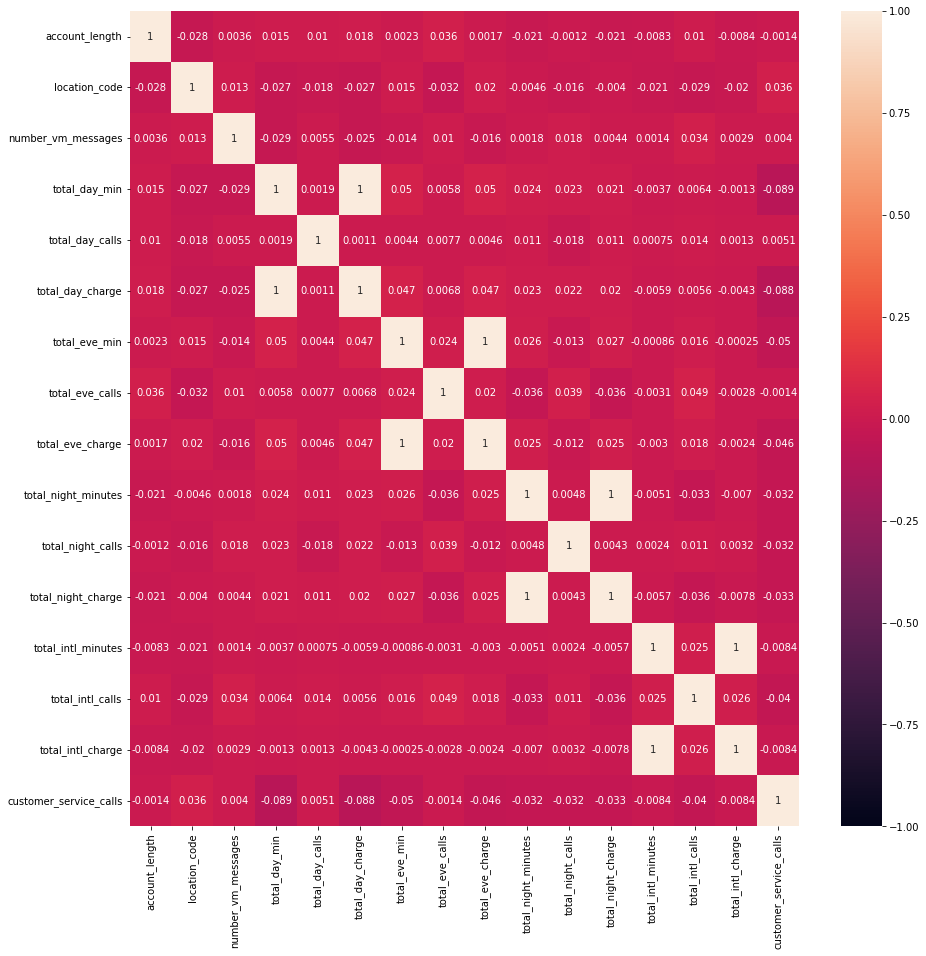

In [38]:
# df_train.isnull().sum()
corr = df_train.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True)

In [39]:
df_train.describe()

,account_length,location_code,number_vm_messages,total_day_min,total_day_calls,total_day_charge,total_eve_min,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,customer_service_calls
count,2310.000000,2312.000000,2308.000000,2306.000000,2307.000000,2305.000000,2307.000000,2306.000000,2304.000000,2309.000000,2307.000000,2306.000000,2307.000000,2309.000000,2307.000000,2311.000000
mean,101.327706,473.525519,7.677643,182.329488,100.812744,30.997748,201.569788,100.247615,17.129679,201.065136,87.628088,9.048803,10.272909,4.441317,2.773658,1.651233
std,39.940975,42.039577,13.589342,57.586778,20.383627,9.750026,50.902322,19.842609,4.325082,50.615058,12.744009,2.277112,2.715550,2.461955,0.733441,1.429572
min,1.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,445.000000,0.000000,144.200000,87.000000,24.500000,166.100000,87.000000,14.180000,167.300000,79.000000,7.530000,8.600000,3.000000,2.320000,1.000000
50%,101.000000,452.000000,0.000000,180.500000,102.000000,30.600000,202.500000,101.000000,17.220000,201.000000,90.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,452.000000,14.250000,221.000000,115.000000,37.590000,236.400000,114.000000,20.090000,234.900000,98.000000,10.580000,12.000000,6.000000,3.240000,2.000000
max,232.000000,547.000000,51.000000,350.800000,165.000000,60.960000,358.500000,170.000000,30.830000,395.000000,105.000000,17.770000,18.300000,20.000000,4.940000,9.000000


In [40]:
# df_1 = df.copy()
# df_1 =df_1.drop(['Unnamed: 20','customer_id'],axis=1)